## tensorflow 高层`API`

从我们构建`AlexNet`模型可以看出,`tensorflow`在定义很多神经网络的基本单元的时候是比较复杂和冗长的.因此大部分时候人们都倾向于使用对`tensorflow`底层代码进行封装的高层`api`，比如`keras`,`slim`,`tflearn`,`skflow`等等.在这里,我们来分别使用`keras`和`slim`这两个非常流行的高层`api`尝试构造`AlexNet`

## Keras

![](https://camo.githubusercontent.com/0d08dc4f9466d347e8d28a951ea51e3430c6f92c/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f6b657261732e696f2f696d672f6b657261732d6c6f676f2d323031382d6c617267652d313230302e706e67)
>Keras是一个高层神经网络API，Keras由纯Python编写而成并基Tensorflow、Theano以及CNTK后端。Keras 为支持快速实验而生，能够把你的idea迅速转换为结果，如果你有如下需求，请选择Keras：

>- 简易和快速的原型设计（keras具有高度模块化，极简，和可扩充特性）
>- 支持CNN和RNN，或二者的结合
>- 无缝CPU和GPU切换

>Keras的设计原则是

>- 用户友好：Keras是为人类而不是天顶星人设计的API。用户的使用体验始终是我们考虑的首要和中心内容。Keras遵循减少认知困难的最佳实践：Keras提供一致而简洁的API， 能够极大减少一般应用下用户的工作量，同时，Keras提供清晰和具有实践意义的bug反馈。
>- 模块性：模型可理解为一个层的序列或数据的运算图，完全可配置的模块可以用最少的代价自由组合在一起。具体而言，网络层、损失函数、优化器、初始化策略、激活函数、正则化方法都是独立的模块，你可以使用它们来构建自己的模型。
>- 易扩展性：添加新模块超级容易，只需要仿照现有的模块编写新的类或函数即可。创建新模块的便利性使得Keras更适合于先进的研究工作。
与Python协作：Keras没有单独的模型配置文件类型（作为对比，caffe有），模型由python代码描述，使其更紧凑和更易debug，并提供了扩展的便利性。
                                      

In [28]:
from __future__ import division
from __future__ import absolute_import
from __future__ import print_function

In [29]:
import keras
from utils import cifar10_input

`Keras`自带了`cifar10`数据集,并且自动分成了训练集和测试集

In [36]:
import numpy as np
import os
from tensorflow.python.keras.datasets.cifar import load_batch
from tensorflow.python.keras import backend as K
# 下载地址'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
def load_data():
  """Loads CIFAR10 dataset.

  Returns:
      Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
  """
  dirname = 'cifar-10-batches-py'
  #origin = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
  path = dirname

  num_train_samples = 50000

  x_train = np.empty((num_train_samples, 3, 32, 32), dtype='uint8')
  y_train = np.empty((num_train_samples,), dtype='uint8')

  for i in range(1, 6):
    fpath = os.path.join(path, 'data_batch_' + str(i))
    (x_train[(i - 1) * 10000:i * 10000, :, :, :],
     y_train[(i - 1) * 10000:i * 10000]) = load_batch(fpath)

  fpath = os.path.join(path, 'test_batch')
  x_test, y_test = load_batch(fpath)

  y_train = np.reshape(y_train, (len(y_train), 1))
  y_test = np.reshape(y_test, (len(y_test), 1))

  if K.image_data_format() == 'channels_last':
    x_train = x_train.transpose(0, 2, 3, 1)
    x_test = x_test.transpose(0, 2, 3, 1)

  return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data()

图片数据归一化

In [37]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')

x_train /= 255
x_test /= 255

In [38]:
print((type(x_train), type(y_train)))
print((x_train.shape, y_train.shape))
print((x_test.shape, y_test.shape))

(<class 'numpy.ndarray'>, <class 'numpy.ndarray'>)
((50000, 32, 32, 3), (50000, 1))
((10000, 32, 32, 3), (10000, 1))


`Keras`的数据不需要转化成`tensorflow`下的`tensor`,可以直接作为网络的输入层

### 构建`Keras`模型
#### `Keras`网络层
`Keras`为了方便用户搭建神经网络模型, 把很多常用的层, 比如`Conv2d`, `MaxPooling2d`,封装起来, 使得输入更加简单明了.
#### `Keras`模型
`Keras`提供`Sequential`和`Model`两种模型的构建方法, 使用他们搭建模型就像搭积木一样非常直观简单.
- - -

- 首先定义一个`Sequential`模型

In [39]:
from keras.models import Sequential

In [40]:
model = Sequential()

从`keras`中导入我们需要的模块

In [41]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import Activation

- 然后添加第一个卷积层, 卷积核为`5x5x64`, 步长为`1x1`, 激活函数是`relu`
- 注意, 添加第一个层的时候需要注明输入的形状是什么

In [42]:
model.add(Conv2D(64, (5, 5), input_shape=(32, 32, 3)))
model.add(Activation('relu'))

- 继续添加第二个池化层, 核为`3x3`, 步长为`2x2`

In [43]:
model.add(MaxPooling2D([3, 3], 2))

- 第三个卷积层`5x5x64`,步长为`1x1`,激活是`relu`

In [44]:
model.add(Conv2D(64, (5, 5), activation='relu'))

- 第四层是核大小`3x3`, 步长为`2x2`的池化层

In [45]:
model.add(MaxPooling2D([3, 3], 2))

- 将矩阵摊平成向量

In [46]:
model.add(Flatten())

- 全连接层, 输出为384维向量

In [47]:
model.add(Dense(384, activation='relu'))

In [48]:
model.add(Dense(192, activation='relu'))

In [49]:
model.add(Dense(10, activation='softmax'))

现在我们已经完成了模型的搭建,.

`keras`还提供了很多方法帮助我们理解模型
- `model.summary()`
- `plot_model`

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 384)               393600    
__________

In [51]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='keras_alexnet.png')

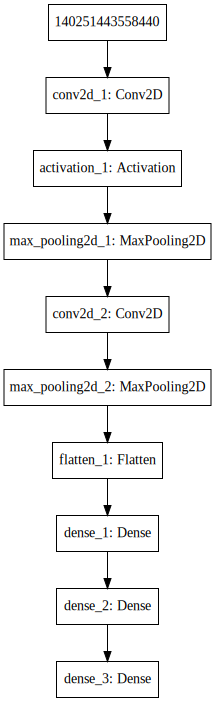

In [52]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

### 模型编译
模型构建完成之后, 我们需要用`compile`来配置训练过程

`model.compile()`接受三个参数:
- optimizer: 优化方法, 有`"sgd"`,`"rmsprop"`,`"adgrad"`等这样的字符串, 也可以是`keras.Optimizers`对象
- loss: 损失函数, 有`categorical_crossentropy`, `mes`等这样的字符串, 也可以是函数形式
- metrics: 评价函数, 如`['accuracy']` , 也支持自定义

In [53]:
from keras import optimizers

In [54]:
sgd = optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=['accuracy'])

将标签转化成`onehot`形式

In [55]:
onehot_train = keras.utils.to_categorical(y_train, num_classes=10)

In [56]:
sgd = optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=['accuracy'])

### 训练
`keras`训练模型非常简单, 用一个`fit`函数就可以搞定

In [ ]:
model.fit(x=x_train, y=onehot_train, epochs=25, batch_size=64)

Epoch 1/25


### 评价
`keras`的评价也非常简单, 用一个`evaluate`就可以

In [ ]:
onehot_test = keras.utils.to_categorical(y_test)

In [ ]:
model.evaluate(x_train, onehot_train, batch_size=128)

In [ ]:
model.evaluate(x_test, onehot_test, batch_size=128)

可以看到, `keras`无论是在构建模型, 构建训练, 还是在评价模型上都比原生的`tensorflow`都要简洁易用.

## TF-Slim

>`TF-Slim`是一个可以在`tensorflow`中实现构建模型,训练模型,评估模型的轻量级代码库. 可以和原生的`tensorflow`或者其他例如`tf.contrib.learn`这样的框架自由组合.

### import tensorflow.contrib.slim as slim

In [ ]:
import tensorflow.contrib.slim as slim

我们来看看如何用`slim`来简化模型的定义,训练和评估. 首先从本地中导入`cifar10`数据集

In [ ]:
import tensorflow as tf
from utils import cifar10_input

In [ ]:
# 我们定义一个批次有64个样本
batch_size = 64

In [ ]:
train_imgs, train_labels, val_imgs, val_labels = cifar10_input.load_data(data_dir='经典卷积神经网络/cifar10_data/')

### Slim 构建模型

#### `slim`中的高级层
`slim`也对`tensorflow`的底层`API`进行了层的封装, 像`Keras`一样, 它也具有
- slim.conv2d
- slim.max_pool2d
- slim.flatten
- slim.fully_connected
- slim.batch_norm

等等高级层, 这些接口也是用户友好的, 例如`slim.conv2d`

第一个参数是输入, 第二个是输出大小, 也就是卷积核的个数, 第三个是卷积核大小, 是一个长度为2的向量, 后面还有很多默认参数,帮助我们快速定义一个卷积层,  可以说是非常简单了

#### arg_scope

然后给大家介绍一个`slim`中独有也非常好用的一个功能: `slim.arg_scope()`

我们知道, 在构建模型的时候会遇到很多相同的参数, 比如说很多卷积层或者池化层的补零策略都是`"VALID"`或者`"SAME"`, 很多变量的初始化函数都是`tf.truncated_normal_initializer`或者`tf.constant_initializer`, 如果全部手动写就会显得非常麻烦. 

这个时候, 可以通过`python`的`with`语句和`slim.arg_scope()`构成一个参数域, 在这个域下一次性定义好所有函数的一些默认参数, 就会非常方便了
- - -
使用`arg_scope`分为两个步骤
- 定义你要对哪些函数使用默认参数
- 定义你要使用的默认参数的具体值

In [ ]:
# 定义`AlexNet`的默认参数域
def alexnet_arg_scope():
    # 首先我们定义卷积和全连接层的参数域, 他们都用`tf.nn.relu`作为激活函数
    # 都用`tf.truncated_normal`作为权重的初始化函数
    with slim.arg_scope([slim.conv2d, slim.fully_connected], 
                       activation_fn=tf.nn.relu, 
                       weights_initializer=tf.truncated_normal_initializer(stddev=1e-2)):
        # 在参数域内部继续定义参数域, 这里, 我们注意到在`AlexNet`中
        # 卷积和池化的补零策略都是`VALID`.
        with slim.arg_scope([slim.conv2d, slim.max_pool2d], 
                            padding='VALID') as sc:
            return sc

然后我们再用`tf-slim`的高级层定义`AlexNet`模型函数

In [ ]:
# 定义alexnet模型
def alexnet(inputs, reuse=None):
    with tf.variable_scope('AlexNet', reuse=reuse):
        net = slim.conv2d(inputs, 64, [5, 5], scope='conv1')
        net = slim.max_pool2d(net, [3, 3], scope='pool1')
        net = slim.conv2d(net, 64, [5, 5], scope='conv2')
        net = slim.max_pool2d(net, [3, 3], scope='pool2')
        net = slim.flatten(net)
        net = slim.fully_connected(net, 384, scope='fc3')
        net = slim.fully_connected(net, 192, scope='fc4')
        net = slim.fully_connected(net, 10, activation_fn=None, scope='classification')
        
        return net

接下来我们使用参数域来定义`AlexNet`模型

In [ ]:
with slim.arg_scope(alexnet_arg_scope()):
    train_out = alexnet(train_imgs)
    val_out = alexnet(val_imgs, reuse=True)

### Slim 统计模型
`Slim`也有类似`Keras`的模型统计功能

In [ ]:
vars_size, vars_bytes = slim.model_analyzer.analyze_vars(variables=tf.model_variables(), print_info=True)

### 训练
`slim`提供了简化训练的一些方法, 但是封装太多不够灵活, 如果想探究的话可以参考`tf-slim`的[官方说明](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/slim).

在这里我们还是回到之前用`tensorflow`定义好的训练函数进行训练

In [ ]:
with tf.variable_scope('loss'):
    train_loss = tf.losses.sparse_softmax_cross_entropy(labels=train_labels, logits=train_out, scope='train')
    val_loss = tf.losses.sparse_softmax_cross_entropy(labels=val_labels, logits=val_out, scope='val')

In [ ]:
with tf.name_scope('accuracy'):
    with tf.name_scope('train'):
        train_acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(train_out, axis=-1, output_type=tf.int32), train_labels), tf.float32))
    with tf.name_scope('train'):
        val_acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(val_out, axis=-1, output_type=tf.int32), val_labels), tf.float32))

In [ ]:
lr = 0.01

opt = tf.train.MomentumOptimizer(lr, momentum=0.9)
train_op = opt.minimize(train_loss)

In [ ]:
from utils.learning import train

In [ ]:
train(train_op, train_loss, train_acc, val_loss, val_acc, 20000, batch_size)

可以看出,`tf-slim`能够和原生的`tensorflow`非常好的衔接在一起, 再加上它构建模型时的优点, 让它成为了现在非常热门的代码库